In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape # row and column number

(1000, 8)

# 2 Dataset information


2.1 check missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### 2.2 check duplicates

In [6]:
df.duplicated().sum()

0

### 2.3 check data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 2.4 check the number of unique vales in each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 2.5 check the statistics of the dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 2.6 Exploring data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in gender variable", end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity variable: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental level of education variable: ", end=" ")
print(df['parental_level_of_education'].unique())

print("categories in lunch variable:  ", end = " ")
print(df['lunch'].unique())

print('categories in test_preparation_variable:  ', end = " ")
print(df['test_preparation_course'].unique())

Categories in gender variable ['female' 'male']
Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable:   ['standard' 'free/reduced']
categories in test_preparation_variable:   ['none' 'completed']


In [12]:
# define numerical and categorical comlumns

numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

print(f"we have {len(numerical_features)} numeric features {numerical_features}")
print(f"we have {len(categorical_features)} categorical features {categorical_features}")

we have 3 numeric features ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 2.7 adding columns for total score and average

In [14]:
df['total score'] = df['math_score']+ df['reading_score']+df['writing_score']
df['average'] = (df['math_score']+ df['reading_score']+df['writing_score'])/3

df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


####  number of students with highest score 

In [15]:
math_full = df[df['math_score']==100]['average'].count()
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
print(f"number of students to have full marks in maths are {math_full}")
print(f"number of students to have full marks in reading are {reading_full}")
print(f"number of students to have full marks in writing are {writing_full}")

number of students to have full marks in maths are 7
number of students to have full marks in reading are 17
number of students to have full marks in writing are 14


#### number of student with lowest score

In [16]:
math_less_20 = df[df['math_score']<=20]['average'].count()
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()

print(f"number of students to have less than 20 marks in maths are {math_less_20}")
print(f"number of students to have less than 20 marks in reading are {reading_less_20}")
print(f"number of students to have less than 20 marks in writing are {writing_less_20}")


number of students to have less than 20 marks in maths are 4
number of students to have less than 20 marks in reading are 1
number of students to have less than 20 marks in writing are 3


# 3. exploring data - visualization

### histogram and kde - with every column

<Axes: xlabel='average', ylabel='Count'>

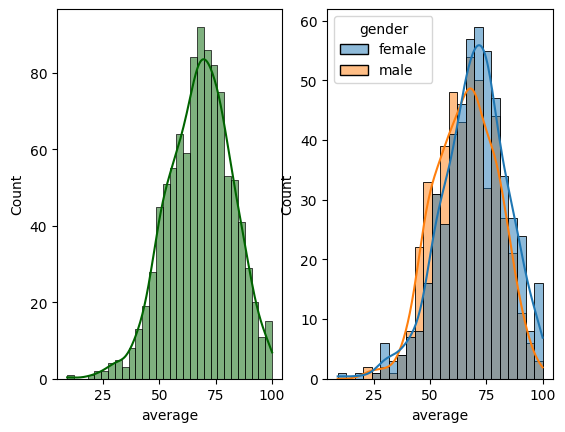

In [17]:
# for average

plt.subplot(1, 2, 1) # iska matlab hai ki 1 row banani hai 2 column banani hai aur first place pe rakhna hai 
sns.histplot(data = df, x = 'average', bins = 30, kde=True, color='darkgreen')
plt.subplot(1, 2, 2)
sns.histplot(data = df, x = 'average', kde = True, hue='gender')

### output of the above graph shows that girls get average more marks as compared to boys

<Axes: xlabel='total score', ylabel='Count'>

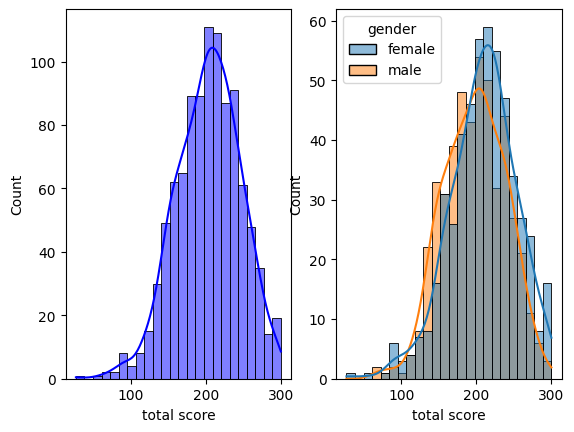

In [18]:
# for total score

plt.subplot(1, 2, 1)
sns.histplot(data = df, x = 'total score', kde = True, color='blue')
plt.subplot(1, 2,2)
sns.histplot(data = df, x = 'total score', kde = True, hue='gender')

#### output of the above graph shows that girls get total score  more as compared to boys

<Axes: xlabel='average', ylabel='Count'>

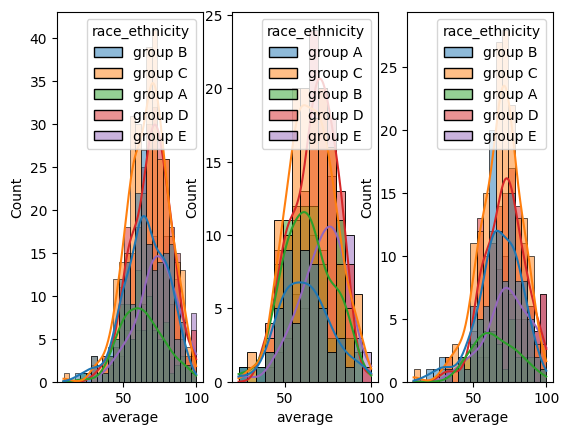

In [19]:
plt.subplot(1,3,1)
sns.histplot(data=df, x = 'average', kde=True, hue = 'race_ethnicity')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='male'], x = 'average', kde=True,  hue = 'race_ethnicity')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='female'], x = 'average', kde=True,  hue = 'race_ethnicity')

<Axes: xlabel='average', ylabel='Count'>

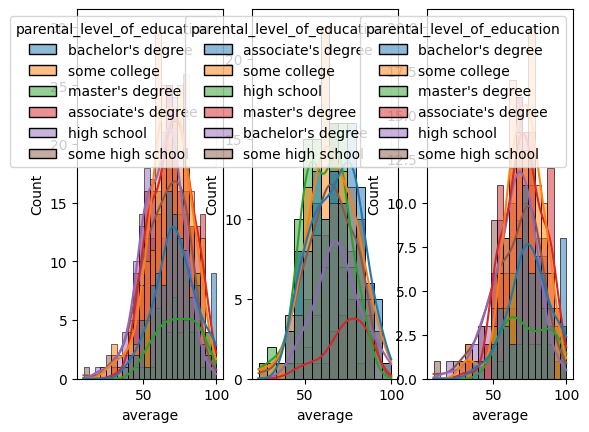

In [20]:
plt.subplot(1,3,1)
sns.histplot(data=df, x = 'average', kde=True, hue = 'parental_level_of_education')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='male'], x = 'average', kde=True,  hue = 'parental_level_of_education')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='female'], x = 'average', kde=True,  hue = 'parental_level_of_education')

<Axes: xlabel='average', ylabel='Count'>

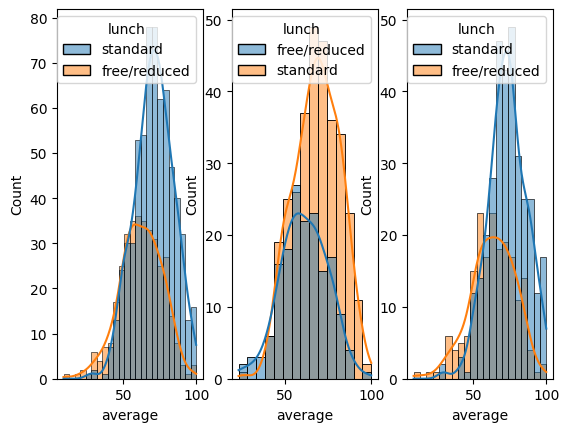

In [21]:
plt.subplot(1,3,1)
sns.histplot(data=df, x = 'average', kde=True, hue = 'lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='male'], x = 'average', kde=True,  hue = 'lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='female'], x = 'average', kde=True,  hue = 'lunch')

#### 3.2 maximum score of students in all 4 subjects

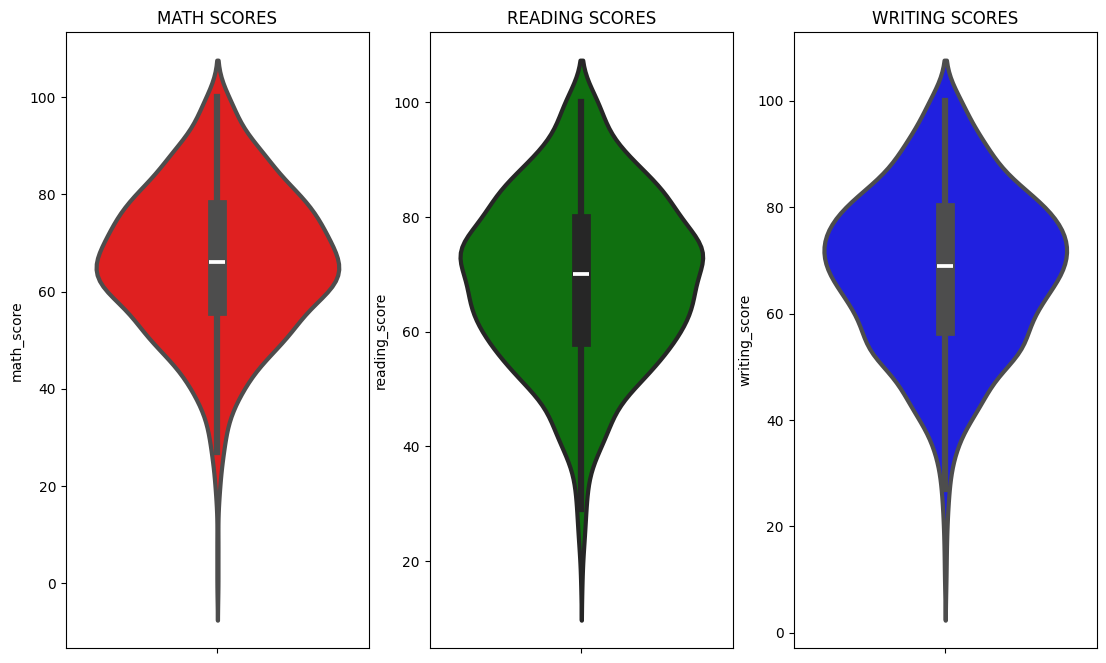

In [22]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### 3.3 Multivariate analysis using pieplot

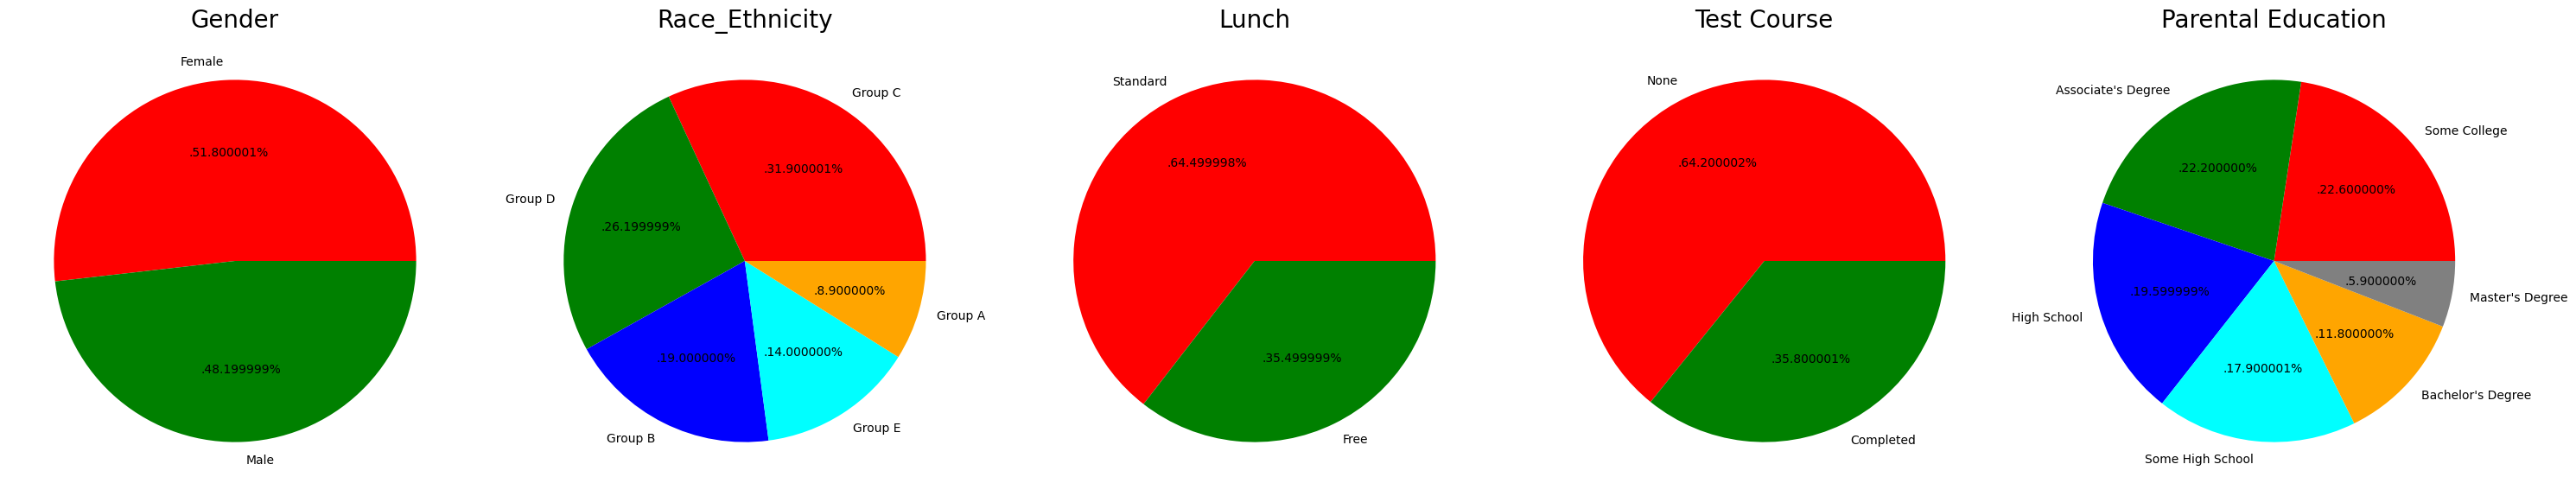

In [24]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### 3.4 feature wise visualization


### 3.4.1 